In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('TASK2_dataset.csv')
train = np.array(df.values[:,1:4]) # removes the ground truth for training
train = np.append(train, [['piano', 'calm', 'slow']], axis=0)
train = np.append(train, [['guitar', 'emotional', 'distorted']], axis=0)
train = np.append(train, [['synth', 'mellow', 'distorted']], axis=0)
groundTruth = np.array(df.values[:,4])
nice = np.unique(np.array(df.values[:,4]), return_counts=True)[1]

# Method 1 - 
univocab, unicounts = np.array(np.unique(train.reshape(-1), return_counts=True)) # unigram dictionary

# Method 2
bigrams = np.array([
    np.array([
        " ".join(train[i ,j:j+2]) 
        for j in range(0,2)
    ]) 
    for i in range(len(train))
])
bivocab, bicounts = np.array(np.unique(bigrams.reshape(-1), return_counts=True)) # bigram dictionary

# Method 3
trigrams = np.array([
    np.array([
        " ".join(train[i ,:])
    ]) 
    for i in range(len(train))
])
trivocab, tricounts = np.array(np.unique(trigrams.reshape(-1), return_counts=True)) # trigram dictionary

# Method 4
def genBiCharGrams(word):
    return [word[i:i+2] for i in range(len(word) - 1)]  # Generate bigrams of characters
bichgrams = [
    genBiCharGrams("".join(train[i ,:]))
    for i in range(len(train))
]
bichgramslist = np.array([item for sublist in bichgrams for item in sublist])
bichvocab, bichcounts = np.array(np.unique(bichgramslist.reshape(-1), return_counts=True))

# Method 5
def genUniCharGrams(word):
    return [word[i:i+1] for i in range(len(word) - 1)]  # Generate bigrams of characters
unichgrams = [
    genUniCharGrams("".join(train[i ,:]))
    for i in range(len(train))
]
unichgramslist = np.array([item for sublist in unichgrams for item in sublist])
unichvocab, unichcounts = np.array(np.unique(unichgramslist.reshape(-1), return_counts=True))

print(bichvocab)

['ab' 'ac' 'ad' 'al' 'an' 'ap' 'ar' 'as' 'at' 'av' 'ba' 'be' 'bl' 'br'
 'ca' 'cd' 'ce' 'cf' 'ch' 'cm' 'co' 'cr' 'cs' 'ct' 'cu' 'da' 'dd' 'df'
 'dh' 'di' 'dm' 'dr' 'ds' 'dt' 'du' 'ea' 'ed' 'el' 'em' 'en' 'er' 'et'
 'fa' 'ge' 'gi' 'gr' 'gu' 'gy' 'ha' 'hc' 'he' 'hh' 'hm' 'hs' 'hu' 'hy'
 'ia' 'ic' 'in' 'io' 'is' 'it' 'jo' 'ld' 'le' 'lf' 'lg' 'li' 'll' 'lm'
 'lo' 'lr' 'ls' 'lt' 'lu' 'md' 'me' 'mf' 'mi' 'mm' 'mo' 'ms' 'mu' 'na'
 'nc' 'ne' 'ng' 'nh' 'nj' 'nm' 'no' 'nt' 'oc' 'od' 'oe' 'oh' 'ol' 'om'
 'on' 'or' 'os' 'ot' 'ou' 'ow' 'pb' 'pi' 'pp' 'py' 'ra' 'rc' 're' 'rg'
 'rh' 'rm' 'rn' 'rs' 'rt' 'ru' 'ry' 'sa' 'sc' 'se' 'sh' 'sl' 'sm' 'ss'
 'st' 'sy' 'ta' 'td' 'te' 'tf' 'th' 'ti' 'to' 'tr' 'tw' 'ui' 'up' 'us'
 'vi' 'vy' 'wa' 'wd' 'wf' 'wh' 'wm' 'wr' 'ws' 'wt' 'wu' 'ya' 'yd' 'yf'
 'yh' 'ym' 'yn' 'yr' 'ys' 'yt' 'yu']


In [2]:
#  this is for unigram vocabulary = 24 words
def containsWordUni(song, word):
    if univocab[word] in " ".join(train[song]): return 1/3
    else: return 0

tfUni = np.array([
    np.array([
        containsWordUni(j, i) 
        for i in range(len(univocab))
    ]).reshape(-1)
    for j in range(len(train))
])
idfUni = np.array([
    np.log((len(train))/(int(unicounts[i]))) 
    for i in range(len(univocab))
])
tfidfUni = np.array([
    tfUni[n] * idfUni
    for n in range(len(train))
])

In [3]:
# this is for bigram vocabulary = 99 words
def containsWordBi(song, word):
    if bivocab[word] in " ".join(train[song]): return 1/2
    else: return 0

tfBi = np.array([
    np.array([
        containsWordBi(j, i) 
        for i in range(len(bivocab))
    ]).reshape(-1)
    for j in range(len(train))
])
idfBi = np.array([
    np.log((len(train))/(int(bicounts[i]))) 
    for i in range(len(bicounts))
])
tfidfBi = np.array([
    tfBi[n] * idfBi
    for n in range(len(train))
])

In [4]:
# this is for Trigram vocabulary = 125 words
def containsWordTri(song, word):
    if trivocab[word] in " ".join(train[song]): return 1
    else: return 0

tfTri = np.array([
    np.array([
        containsWordTri(j, i) 
        for i in range(len(trivocab))
    ]).reshape(-1)
    for j in range(len(train))
])
idfTri = np.array([
    np.log((len(train))/(int(tricounts[i]))) 
    for i in range(len(tricounts))
])
tfidfTri = np.array([
    tfTri[n] * idfTri
    for n in range(len(train))
])

In [5]:
# this is for UniChargram vocabulary = 22 words
def containsWordUnich(song, word):
    if unichvocab[word] in " ".join(train[song]): return 1/len(train[song])
    else: return 0

tfUnich = np.array([
    np.array([
        containsWordUnich(j, i) 
        for i in range(len(unichvocab))
    ]).reshape(-1)
    for j in range(len(train))
])
idfUnich = np.array([
    np.log((len(train))/(int(unichcounts[i]))) 
    for i in range(len(unichcounts))
])
tfidfUnich = np.array([
    tfUnich[n] * idfUnich
    for n in range(len(train))
])

In [6]:
# this is for BiChargram vocabulary = 161 words
def containsWordBich(song, word):
    if bichvocab[word] in " ".join(train[song]): return 1/len(train[song])
    else: return 0

tfBich = np.array([
    np.array([
        containsWordBich(j, i) 
        for i in range(len(bichvocab))
    ]).reshape(-1)
    for j in range(len(train))
])
idfBich = np.array([
    np.log((len(train))/(int(bichcounts[i]))) 
    for i in range(len(bichcounts))
])
tfidfBich = np.array([
    tfBich[n] * idfBich
    for n in range(len(train))
])

In [7]:
# the division by np.std does scaling keep in mind
def standardizeCovMatrix(doc):
    newDoc = np.array([
        np.array([
            (doc[j][i] - np.mean(doc[j]))/np.std(doc[j]) # warning: here if the vector has all components equal, then we get devi by 0
            for i in range(len(doc[j]))
        ]) 
        for j in range(len(doc))
    ])
    return np.cov(newDoc.T) # veryyyyy imp to transpose the matrix before cov

In [8]:
# K-means, k = 5
def k_means(data, k, seed):
    iterations = 100
    np.random.seed(seed) # so that it generates the same random numbers everytime its run!!!
    centroids = data[np.random.choice(len(data), 5, replace=False)] # replace = false ensures no point is repeated
    for x in range(iterations):
        labels = np.array([np.argmin([np.linalg.norm(a - c) for c in centroids]) for a in data]) # assign points some label
        centroidsNew = np.array([data[labels == i].mean(axis=0) for i in range(k)]) # calculate new centroids using the labelled points
        if np.all(centroids == centroidsNew): break
        centroids = centroidsNew
    return centroids, labels
def plot(labels):
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='prism', s=70)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='black', s=40)
    plt.title(f"K-Means Clustering")
    handles, _ = scatter.legend_elements()
    plt.legend(handles, [f"Cluster {i + 1}" for i in np.unique(labels)])
    plt.show()
def score(X, labels):
    n = X.shape[0]
    silscores = []
    dists = np.zeros((n, n)) # initiate blank array
    # pairwise distances
    for i in range(n):
        for j in range(i + 1, n):
            dist = np.linalg.norm(X[i] - X[j])
            dists[i, j] = dists[j, i] = dist  # cuz its a symmetric matrix
    # calc sil score for each pt
    for i in range(n):
        ai = np.mean([dists[i, j] for j in range(n) if labels[j] == labels[i] and j != i]) 
        # Separation: average distance to points in the nearest cluster
        other_clusters = np.unique(labels[labels != labels[i]])
        biValues = []
        for cluster in other_clusters:
            bi = np.mean([dists[i, j] for j in range(n) if labels[j] == cluster])
            biValues.append(bi)
        bi = min(biValues)  # Nearest cluster for separation
        si = (bi - ai) / max(ai, bi) # sil score for point i
        silscores.append(si)
    return np.mean(silscores)
def percentDist(labels):
    temp = np.vstack((labels[0:147].astype(str), groundTruth.T)).T
    test = np.array([
        np.array([
            " ".join(temp[i ,:])
        ]) 
        for i in range(len(temp))
    ])
    pairs, counts = np.unique(test, return_counts=True)
    temp2 = np.vstack((pairs, counts)).T
    labels = np.array([s.split()[0] for s in temp2[:, 0]])
    genres = np.array([s.split()[1] for s in temp2[:, 0]])
    labels = labels.astype(int)
    doc = np.column_stack((labels, genres, temp2[:, 1]))
    print("Cluster Genre Distribution:")
    for n in range(5):
        data = np.array([
            doc[i] for i in range(len(doc)) if doc[i, 0] == str(n)
        ])
        Sum = sum((data[:, 2]).astype(int))
        clscal = 0
        cntry = 0
        hiphp = 0
        pp = 0
        rck = 0
        if "classical" in data[:,1]: clscal = data[np.where(data[:, 1] == "classical")[0],2][0].astype(int)
        if "country" in data[:,1]: cntry = data[np.where(data[:, 1] == "country")[0],2][0].astype(int)
        if "hip-hop" in data[:,1]: hiphp = data[np.where(data[:, 1] == "hip-hop")[0],2][0].astype(int)
        if "pop" in data[:,1]: pp = data[np.where(data[:, 1] == "pop")[0],2][0].astype(int)
        if "rock" in data[:,1]: rck = data[np.where(data[:, 1] == "rock")[0],2][0].astype(int)
        print(f"    [Cluster {n+1}] Classical: {round(clscal * 100/Sum, 2):>5}%, Country: {round(cntry * 100/Sum, 2):>5}%, Hip-Hop: {round(hiphp * 100/Sum, 2):>5}%, Pop: {round(pp * 100/Sum, 2):>5}%, Rock: {round(rck * 100/Sum, 2):>5}%")
def predictor(labels):
    keywords = train[147:]
    labels = labels[147:]
    for i in range(3):
        print(f"The song with keywords {keywords[i]} might belong to cluster {labels[i] + 1}")
    

def info(X, labels):
    percentDist(labels)
    predictor(labels)
    print(f"Silhouette Score: {round(score(X, labels), 4)}")

Unigram Embedding
Cluster Genre Distribution:
    [Cluster 1] Classical: 44.83%, Country: 17.24%, Hip-Hop:   6.9%, Pop: 10.34%, Rock: 20.69%
    [Cluster 2] Classical:   0.0%, Country: 21.05%, Hip-Hop: 31.58%, Pop: 47.37%, Rock:   0.0%
    [Cluster 3] Classical: 10.87%, Country: 19.57%, Hip-Hop: 19.57%, Pop: 26.09%, Rock: 23.91%
    [Cluster 4] Classical:  25.0%, Country:  8.33%, Hip-Hop: 36.11%, Pop: 16.67%, Rock: 13.89%
    [Cluster 5] Classical:   0.0%, Country: 47.06%, Hip-Hop:   0.0%, Pop:  5.88%, Rock: 47.06%
The song with keywords ['piano' 'calm' 'slow'] might belong to cluster 1
The song with keywords ['guitar' 'emotional' 'distorted'] might belong to cluster 3
The song with keywords ['synth' 'mellow' 'distorted'] might belong to cluster 5
Silhouette Score: 0.3531


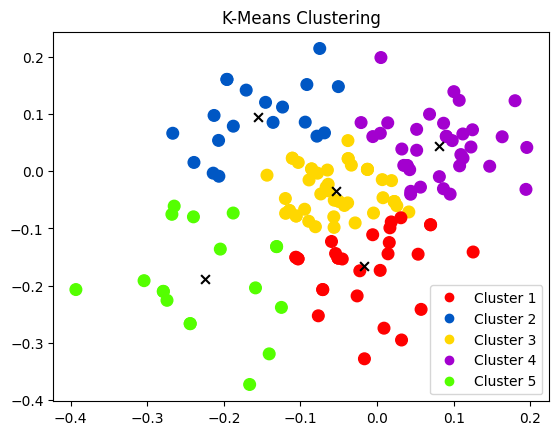

In [9]:
print('Unigram Embedding')
eigenuni, eigenvecUni = np.linalg.eigh(standardizeCovMatrix(tfidfUni))
pcUni = np.array([np.dot(tfidfUni, eigenvecUni[i]) for i in range(18,24)])
embedsUni = np.array([
    [pcUni[i], pcUni[j]] for i in range(len(pcUni)) for j in range(i)
])
UniPlt = np.mean(embedsUni, axis=0)
X = UniPlt.T
centroids, labelsUni = k_means(X, 5, 94)
info(X, labelsUni)
plot(labelsUni)

Bigram Embedding
Cluster Genre Distribution:
    [Cluster 1] Classical:  40.0%, Country:   0.0%, Hip-Hop:   0.0%, Pop:  60.0%, Rock:   0.0%
    [Cluster 2] Classical: 14.81%, Country: 25.93%, Hip-Hop: 14.81%, Pop:  7.41%, Rock: 37.04%
    [Cluster 3] Classical:  10.0%, Country:  30.0%, Hip-Hop:  30.0%, Pop:  20.0%, Rock:  10.0%
    [Cluster 4] Classical: 15.79%, Country: 10.53%, Hip-Hop: 21.05%, Pop: 36.84%, Rock: 15.79%
    [Cluster 5] Classical: 19.77%, Country: 19.77%, Hip-Hop: 22.09%, Pop: 19.77%, Rock:  18.6%
The song with keywords ['piano' 'calm' 'slow'] might belong to cluster 2
The song with keywords ['guitar' 'emotional' 'distorted'] might belong to cluster 5
The song with keywords ['synth' 'mellow' 'distorted'] might belong to cluster 5
Silhouette Score: 0.5102


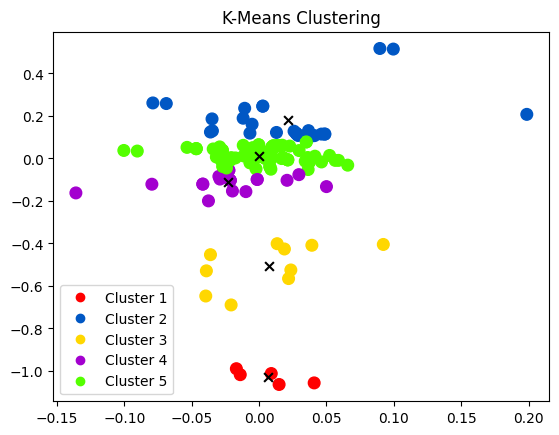

In [10]:
print('Bigram Embedding')
eigenbi, eigenvecBi = np.linalg.eigh(standardizeCovMatrix(tfidfBi))
pcBi = np.array([np.dot(tfidfBi, eigenvecBi[i]) for i in range(56,98)])
embedsBi = np.array([
    [pcBi[i], pcBi[30]] for i in range(len(pcBi))
])
BiPlt = np.mean(embedsBi, axis=0)
X = BiPlt.T
centroids, labelsBi = k_means(X, 5, 37)
info(X, labelsBi)
plot(labelsBi)

Trigram Embedding
Cluster Genre Distribution:
    [Cluster 1] Classical: 18.75%, Country:  12.5%, Hip-Hop: 31.25%, Pop: 18.75%, Rock: 18.75%
    [Cluster 2] Classical:  4.55%, Country: 27.27%, Hip-Hop: 22.73%, Pop: 27.27%, Rock: 18.18%
    [Cluster 3] Classical:  37.5%, Country:  12.5%, Hip-Hop:  25.0%, Pop:  25.0%, Rock:   0.0%
    [Cluster 4] Classical: 20.99%, Country: 18.52%, Hip-Hop: 12.35%, Pop: 22.22%, Rock: 25.93%
    [Cluster 5] Classical:  15.0%, Country:  25.0%, Hip-Hop:  40.0%, Pop:  10.0%, Rock:  10.0%
The song with keywords ['piano' 'calm' 'slow'] might belong to cluster 4
The song with keywords ['guitar' 'emotional' 'distorted'] might belong to cluster 4
The song with keywords ['synth' 'mellow' 'distorted'] might belong to cluster 2
Silhouette Score: 0.4078


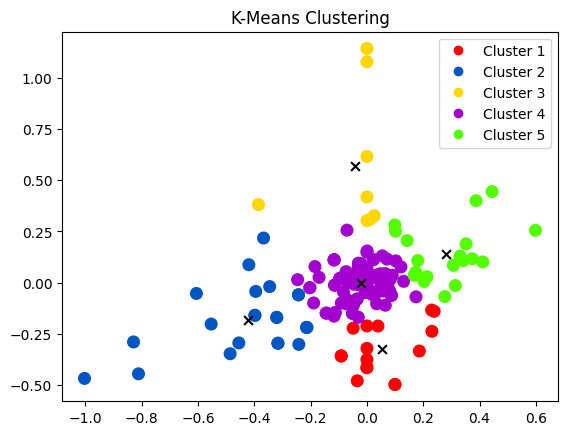

In [11]:
print('Trigram Embedding')
eigentri, eigenvecTri = np.linalg.eigh(standardizeCovMatrix(tfidfTri))
indicestri = [104, 105, 122, 123, 124]
pcTri = np.array([np.dot(tfidfTri, eigenvecTri[i]) for i in indicestri])
embedsTri = np.array([
    [pcTri[i], pcTri[j]] for i in range(len(pcTri)) for j in range(i)
])
TriPlt = np.mean(embedsTri, axis=0)
X = TriPlt.T
centroids, labelsTri = k_means(X, 5, 28)
info(X, labelsTri)
plot(labelsTri)

UniChargram Embedding
Cluster Genre Distribution:
    [Cluster 1] Classical: 26.47%, Country: 29.41%, Hip-Hop:   0.0%, Pop: 14.71%, Rock: 29.41%
    [Cluster 2] Classical: 35.29%, Country: 17.65%, Hip-Hop: 23.53%, Pop:   0.0%, Rock: 23.53%
    [Cluster 3] Classical:  4.76%, Country: 23.81%, Hip-Hop: 42.86%, Pop: 28.57%, Rock:   0.0%
    [Cluster 4] Classical: 11.43%, Country: 15.71%, Hip-Hop: 22.86%, Pop: 28.57%, Rock: 21.43%
    [Cluster 5] Classical:  60.0%, Country:   0.0%, Hip-Hop:  20.0%, Pop:   0.0%, Rock:  20.0%
The song with keywords ['piano' 'calm' 'slow'] might belong to cluster 4
The song with keywords ['guitar' 'emotional' 'distorted'] might belong to cluster 1
The song with keywords ['synth' 'mellow' 'distorted'] might belong to cluster 3
Silhouette Score: 0.6282


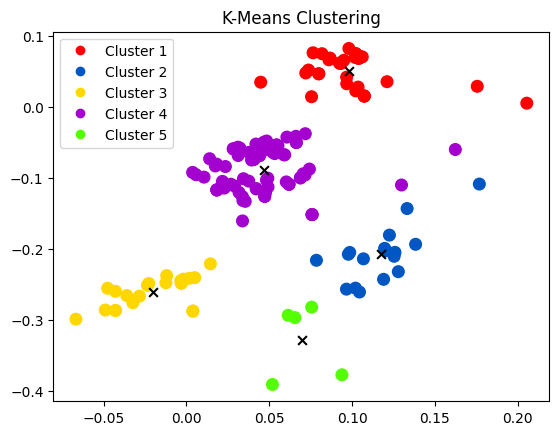

In [12]:
print('UniChargram Embedding')
eigenunich, eigenvecUnich = np.linalg.eigh(standardizeCovMatrix(tfidfUnich))
indicesuni = [17, 18, 19, 20 ,21]
pcUnich = np.array([np.dot(tfidfUnich, eigenvecUnich[i]) for i in indicesuni])
embedsUnich = np.array([
    [pcUnich[i], pcUnich[3]] for i in range(len(pcUnich)) for j in range(i)
])
UnichPlt = np.mean(embedsUnich, axis=0)
X = UnichPlt.T
centroids, labelsUni = k_means(X, 5, 99)
info(X, labelsUni)
plot(labelsUni)

Cluster Genre Distribution:
    [Cluster 1] Classical: 26.23%, Country: 13.11%, Hip-Hop: 29.51%, Pop: 18.03%, Rock: 13.11%
    [Cluster 2] Classical:   0.0%, Country:  30.0%, Hip-Hop:  60.0%, Pop:   0.0%, Rock:  10.0%
    [Cluster 3] Classical: 13.04%, Country:  4.35%, Hip-Hop: 26.09%, Pop: 56.52%, Rock:   0.0%
    [Cluster 4] Classical: 16.67%, Country: 35.42%, Hip-Hop:   0.0%, Pop: 14.58%, Rock: 33.33%
    [Cluster 5] Classical:   0.0%, Country:   0.0%, Hip-Hop:   0.0%, Pop:   0.0%, Rock: 100.0%
The song with keywords ['piano' 'calm' 'slow'] might belong to cluster 1
The song with keywords ['guitar' 'emotional' 'distorted'] might belong to cluster 3
The song with keywords ['synth' 'mellow' 'distorted'] might belong to cluster 3
Silhouette Score: 0.5987


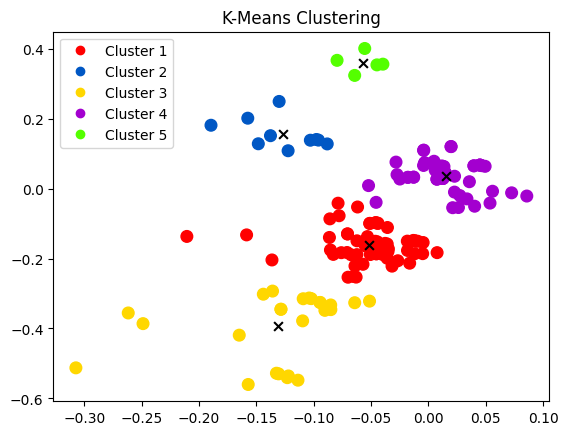

In [13]:
# print('BiChargram Embedding')
eigenbich, eigenvecBich = np.linalg.eigh(standardizeCovMatrix(tfidfBich))
indicesbi = [150,151,152,153,154,155,156,157,158,159,160]
pcBich = np.array([np.dot(tfidfBich, eigenvecBich[i]) for i in indicesbi])
embedsBich = np.array([
    [pcBich[i], pcBich[8]] for i in range(len(pcBich)) for j in range(i)
])
BichPlt = np.mean(embedsBich, axis=0)
X = BichPlt.T
centroids, labelsBich2 = k_means(X, 5, 10)
info(X, labelsBich2)
plot(labelsBich2)

In [14]:
# seed tester
X = UnichPlt.T
def k_means_test(data, k):
        iterations = 100
        centroids = data[np.random.choice(len(data), 5, replace=False)] # replace = false ensures no point is repeated
        for x in range(iterations):
            labels = np.array([np.argmin([np.linalg.norm(a - c) for c in centroids]) for a in data]) # assign points some label
            centroidsNew = np.array([data[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i] for i in range(k)]) # calculate new centroids using the labelled points
            if np.all(centroids == centroidsNew): break
            centroids = centroidsNew
        return centroids, labels
for n in range(70,100):
    np.random.seed(n)
    centroids, labels = k_means_test(X, 5)
    nice = np.unique(labels, return_counts=True)[1]
    print(f"sil score: {round(score(X, labels), 4)} and range: {max(nice) - min(nice)}")

sil score: 0.5327 and range: 14
sil score: 0.5282 and range: 20
sil score: 0.5148 and range: 57
sil score: 0.5659 and range: 58
sil score: 0.5355 and range: 21
sil score: 0.5327 and range: 14
sil score: 0.6146 and range: 63
sil score: 0.5678 and range: 57
sil score: 0.5379 and range: 19
sil score: 0.5836 and range: 59
sil score: 0.5327 and range: 14
sil score: 0.516 and range: 47
sil score: 0.5327 and range: 14
sil score: 0.5379 and range: 19
sil score: 0.5259 and range: 18
sil score: 0.5281 and range: 14
sil score: 0.6295 and range: 66
sil score: 0.5259 and range: 18
sil score: 0.5379 and range: 19
sil score: 0.5327 and range: 14
sil score: 0.5315 and range: 19
sil score: 0.5327 and range: 14
sil score: 0.5374 and range: 18
sil score: 0.5678 and range: 57
sil score: 0.5244 and range: 18
sil score: 0.6146 and range: 63
sil score: 0.5829 and range: 58
sil score: 0.5208 and range: 67
sil score: 0.6146 and range: 63
sil score: 0.6282 and range: 66
